In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

gdp_change = pd.read_csv('/content/gdp_change.csv')
emissions = pd.read_csv('/content/emissions.csv')
internet_user = pd.read_csv('/content/internet_user.csv')
gini = pd.read_csv('/content/gini.csv')
life_expect = pd.read_csv('/content/life_expect.csv')
population = pd.read_csv('/content/population.csv')
child = pd.read_csv('/content/child.csv')


# Country Rowwise

In [ ]:
gdp_change['country'] = gdp_change['country'].apply(lambda x : str(x))

In [ ]:
oly = pd.read_csv('/content/med_sort.csv')

oly['Total_Medals'] = oly['Bronze'] + oly['Silver'] + oly['Gold']
oly['Year-Country'] = oly['Country_x'] + ',' + (oly['Key_Column']).astype(str)

agg_functions = {'Country_x':'first','Total_Medals':'sum'}
ggdf = oly.groupby(oly['Year-Country']).aggregate(agg_functions)

ggdf = ggdf.reset_index()
ggdf[['Country', 'Year']] = ggdf['Year-Country'].str.split(',', expand=True)

ggdf = ggdf.drop(columns = 'Year-Country')
ggdf = ggdf.drop(columns = 'Country_x')

df1 = oly
df2 = ggdf

for index, row in df2.iterrows():
    condition = (df1['Key_Column'].astype(str) == row['Year']) & (df1['Country_x'] == row['Country'])
    df1.loc[condition, 'Total_Medals'] = row['Total_Medals']

oly['Event_Count'] = oly['Total_Medals']

In [ ]:
def agmedal(df):
  df.aggregate({'Bronze':'sum',
                'Silver':'sum',
                'Gold':'sum'})
def sumcol(country, column):
  output = []
  gre = oly[oly.Country_x == country]
  for x in oly.Key_Column.unique():
    if x in gre.Key_Column.unique():
      output.append(gre[gre['Key_Column'] == x][column].iloc[0])
    else:
      output.append(0)
  return output

In [ ]:
x = sumcol('GRE', 'Event_Count')
x = np.array(x)
x = x.reshape(1, -1)

In [ ]:
total_medals = pd.DataFrame(x, ['Greece'], oly.Key_Column.unique())

In [ ]:
def framer(column):
  # initialize cumulative dataframe
  cum = total_medals
  for country in oly.Country_x.unique():
    x = sumcol(country, column)
    x = np.array(x)
    x = x.reshape(1, -1)
    output = pd.DataFrame(x, [country], oly.Key_Column.unique())
    cum = pd.concat([cum, output], axis=0)
  return cum.drop('Greece')

In [ ]:
totals = framer('Event_Count')
totals.index.name = 'country'

In [ ]:
totals = totals.reset_index()

In [ ]:
df = totals.reset_index()

df.loc[df['country'] == 'EUA', 'country'] = 'GER'
df.loc[df['country'] == 'FRG', 'country'] = 'GER'
df.loc[df['country'] == 'GDR', 'country'] = 'GER'
df.loc[df['country'] == 'RU1', 'country'] = 'RUS'
df.loc[df['country'] == 'URS', 'country'] = 'RUS'

In [ ]:
agg_functions = {'country':'first',1896: 'sum', 1900: 'sum',1904: 'sum', 1908:'sum',
                 1912:'sum',1920:'sum',1924:'sum',1928:'sum',1932:'sum',
                 1936: 'sum',1948:'sum',1952:'sum',1956:'sum',
                 1960:'sum',1964:'sum',1968:'sum',1972:'sum', 1976: 'sum', 1980: 'sum',
                 1984:'sum',1988: 'sum', 1992:'sum', 1994: 'sum', 1996: 'sum', 1998:'sum', 2000: 'sum',
                 2002:'sum',2004: 'sum',2006:'sum',2008:'sum',2010:'sum',2012: 'sum',2014:'sum'
                 }
totals = df.groupby(df['country']).aggregate(agg_functions)

In [ ]:
totals = totals.drop(columns = 'country')

In [ ]:
internet_user = internet_user.reindex(columns=['1896','1897','1898','1899','1900','1901','1902','1903','1904',
                               '1905','1906','1907','1908','1909','1910','1911','1912','1913',
                               '1914','1915','1916','1917','1918','1919','1920','1921','1922',
                               '1923','1924','1925','1926','1927','1928','1929','1930','1931',
                               '1932','1933','1934','1935','1936','1937','1938','1939','1940',
                               '1941','1942','1943','1944','1945','1946','1947','1948','1949',
                               '1950','1951','1952','1953','1954','1955','1956','1957','1958',
                               '1959', *internet_user.columns.tolist()], fill_value=0)

gdp_change = gdp_change.reindex(columns=['1800', *gdp_change.columns.tolist()], fill_value = 0)

In [ ]:
gdp_change.set_index('country', inplace=True)
child.set_index('country',inplace=True)
emissions.set_index('country', inplace=True)
gini.set_index('country', inplace=True)
internet_user.set_index('country', inplace=True)
life_expect.set_index('country', inplace=True)
population.set_index('country', inplace=True)

In [ ]:
#Take the average of every four years for gapminder sets and combine the two year intervals in totals

dfs1 = [gdp_change, child, emissions, gini, internet_user, life_expect, population]

dfsnew = []

for i, df in enumerate(dfs1):
  years = df.columns
  df_four_years_avg = pd.DataFrame()
  for i in range(0, len(years), 4):
    subset = df.iloc[:, i:i+4]
    avg_values = subset.mean(axis=1)
    df_four_years_avg[years[i]] = avg_values
  dfsnew.append(df_four_years_avg)

gdp_change = dfsnew[0]
child = dfsnew[1]
emissions = dfsnew[2]
gini = dfsnew[3]
internet_user = dfsnew[4]
life_expect = dfsnew[5]
population = dfsnew[6]

totals[2012] = totals[2012] + totals[2014]
totals[2008] = totals[2008] + totals[2010]
totals[2004] = totals[2004] + totals[2006]
totals[2000] = totals[2000] + totals[2002]
totals[1996] = totals[1996] + totals[1998]
totals[1992] = totals[1992] + totals[1994]
totals = totals.drop(columns = [2014, 2010, 2006, 2002, 1998, 1994])

In [ ]:
dfs = [totals, gdp_change, child, emissions, gini, internet_user, life_expect, population]

common_index = set(dfs[0].index)

common_columns = set(dfs[0].columns)
common_columns = list(common_columns)
common_columns.sort()
common_year = common_columns

for df in dfs[1:]:
  common_index = common_index.intersection(df.index)

common_index = list(common_index)

years = {}
for i, df in enumerate(dfs):
  dfs[i] = df.reindex(index = common_index)
  for x in dfs[i].columns:
    years[x] = int(x)
  dfs[i].rename(columns = years, inplace = True)
  dfs[i] = (dfs[i])[common_year]
  dfs[i] = dfs[i].sort_index()
  dfs[i] = dfs[i].reset_index()

totals1 = dfs[0]
gdp_change1 = dfs[1]
child1 = dfs[2]
emissions1 = dfs[3]
gini1 = dfs[4]
internet_user1 = dfs[5]
life_expect1 = dfs[6]
population1 = dfs[7]

In [ ]:
df_transformed1 = pd.melt(gdp_change1, id_vars=['country'], var_name='Year1', value_name='Value1')
df_transformed2 = pd.melt(totals1, id_vars=['country'], var_name='Year1', value_name='Value2')
df_transformed3 = pd.melt(child1, id_vars=['country'], var_name='Year1', value_name='Value3')
df_transformed4 = pd.melt(emissions1, id_vars=['country'], var_name='Year1', value_name='Value4')
df_transformed5 = pd.melt(gini1, id_vars=['country'], var_name='Year1', value_name='Value5')
df_transformed6 = pd.melt(internet_user1, id_vars=['country'], var_name='Year1', value_name='Value6')
df_transformed7 = pd.melt(life_expect1, id_vars=['country'], var_name='Year1', value_name='Value7')
df_transformed8 = pd.melt(population1, id_vars=['country'], var_name='Year1', value_name='Value8')

data = {'Country': df_transformed1['country'],'Year': df_transformed1['Year1'],
        'MedalsWon': df_transformed2['Value2'], 'GDP': df_transformed1['Value1'],
        'Children': df_transformed3['Value3'], 'Emissions': df_transformed4['Value4'],
        'Gini': df_transformed5['Value5'], 'Internet_Users': df_transformed6['Value6'],
        'Life_Expectancy': df_transformed7['Value7'], 'Population': df_transformed8['Value8'],
        }

df = pd.DataFrame(data)

In [ ]:
df

,Country,Year,MedalsWon,GDP,Children,Emissions,Gini,Internet_Users,Life_Expectancy,Population
0,AFG,1896,0,1.050000,7.0000,0.00000,38.350,0.000,32.625,4610000.0
1,ALG,1896,0,2.027500,6.9900,0.00000,42.400,0.000,31.750,4545000.0
2,ARG,1896,0,3.047500,6.3500,0.54075,47.050,0.000,34.700,4165000.0
3,ARM,1896,0,1.613750,8.0850,0.10380,36.925,0.000,36.200,835750.0
4,AUS,1896,2,3.010000,3.8250,1.41750,37.325,0.000,48.175,3472500.0
...,...,...,...,...,...,...,...,...,...,...
3343,UZB,2012,3,7.266667,2.3750,3.63750,51.200,21.225,66.900,29875000.0
3344,VEN,2012,1,3.590000,2.3975,6.06000,35.000,29.200,75.450,29725000.0
3345,VIE,2012,0,5.470000,1.9575,1.66000,35.000,38.850,73.575,90025000.0
3346,ZAM,2012,0,6.496667,5.1925,0.24075,56.425,3.850,59.075,15100000.0


# Exploratory Analysis

In [ ]:
df2 = df.groupby('Country')['MedalsWon'].sum().reset_index()
merged_df = pd.merge(df, df2, on='Country',suffixes=('', '_Total'))

single_country = merged_df[merged_df['Country']  == 'USA']
USA = (single_country.pivot(index="Year", columns="MedalsWon", values="GDP"))
filtered_df = merged_df[merged_df['MedalsWon_Total']  >= 100]

scatterplot = sns.scatterplot(x='Year', y='GDP', hue='Country', size='MedalsWon_Total', data=filtered_df, sizes=(30, 300), palette='Paired')
plt.title('Scatter Plot of GDP and Olympic Medals Over Time')
plt.xlabel('Year')
scatterplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.show()
plt.close()

sns.scatterplot(x='MedalsWon', y='GDP', hue='Country', data=filtered_df, palette='viridis', s=100)
plt.title('Medals Won vs Change in GDP')
plt.xlabel('Number of Medals Won')
plt.ylabel('Change in GDP')
plt.legend(title='Country', bbox_to_anchor=(1, 1))
scatterplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.show()
plt.close()

g = sns.FacetGrid(filtered_df, col="Country", col_wrap=5, height=3)
g.map(sns.lineplot, "MedalsWon", "GDP", ci=None)
g.set_axis_labels("MedalsWon", "GDP")
g.set_titles(col_template="{col_name}")
plt.show()
plt.close()

cluster_data = filtered_df.pivot_table(index='Country', columns='Year', values='MedalsWon', aggfunc='sum')
vmax_value1 = 60
sns.clustermap(cluster_data, cmap='coolwarm', method='average', col_cluster=False, figsize=(15, 8), vmax=vmax_value1)
plt.title('Clustermap: Hierarchical Clustering of Countries based on Olympic Medals and GDP (Part1)')
plt.show()
plt.savefig('Cluster1.png')
cluster_data = filtered_df.pivot_table(index='Country', columns='Year', values='GDP', aggfunc='sum')
vmax_value2 = 10
sns.clustermap(cluster_data, cmap='coolwarm', method='average', col_cluster=False, figsize=(15, 8), vmax=vmax_value2)
plt.title('Clustermap: Hierarchical Clustering of Countries based on Olympic Medals and GDP (Part2)')
plt.show()
plt.close()

merged_df

NameError: ignored

In [ ]:
single_country

,Country,Year,MedalsWon,GDP,Children,Emissions,Gini,Internet_Users,Life_Expectancy,Population,MedalsWon_Total
3186,USA,1896,19,5.42500,4.0100,6.8200,51.2,0.00000,47.675,70150000.0,2698
3187,USA,1900,47,6.04000,3.8600,8.7150,51.2,0.00000,49.375,75525000.0,2698
3188,USA,1904,233,5.61750,3.7700,10.9750,51.2,0.00000,50.175,81500000.0,2698
3189,USA,1908,46,1.65250,3.6175,12.6000,51.2,0.00000,51.775,87825000.0,2698
3190,USA,1912,62,1.04500,3.5375,13.4250,51.2,0.00000,54.000,93550000.0,2698
3191,USA,1920,95,0.79625,3.1925,13.5500,51.2,0.00000,56.850,104500000.0,2698
3192,USA,1924,105,6.27500,3.0325,15.2250,51.2,0.00000,58.200,111000000.0,2698
3193,USA,1928,62,-0.16100,2.6350,14.6750,51.2,0.00000,59.050,117500000.0,2698
3194,USA,1932,116,-3.81250,2.2000,10.5575,51.2,0.00000,60.750,122500000.0,2698
3195,USA,1936,60,5.53250,2.0450,12.1000,51.2,0.00000,61.350,125500000.0,2698


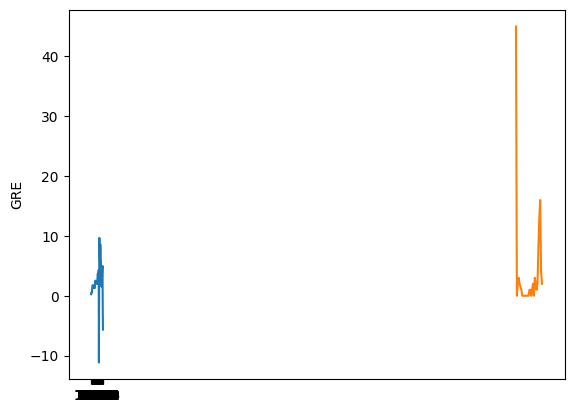

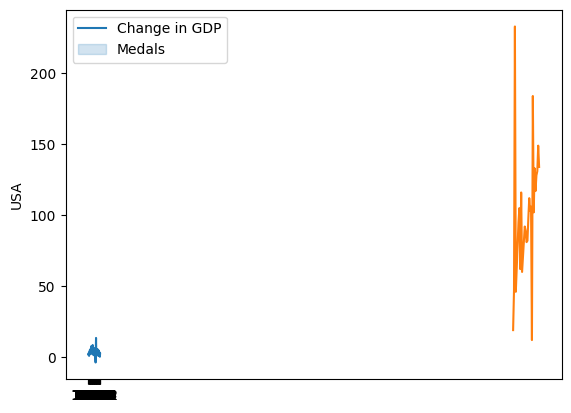

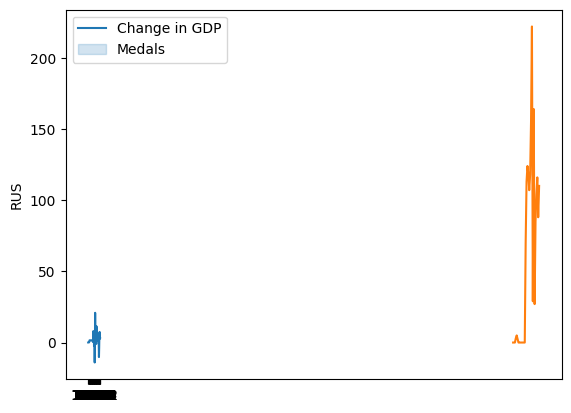

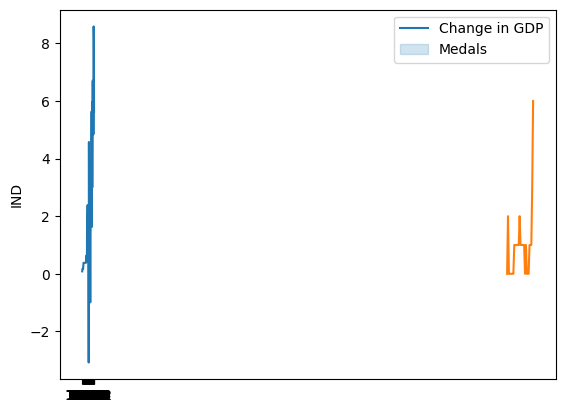

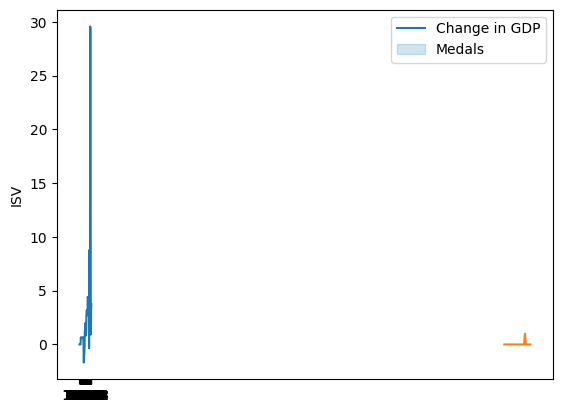

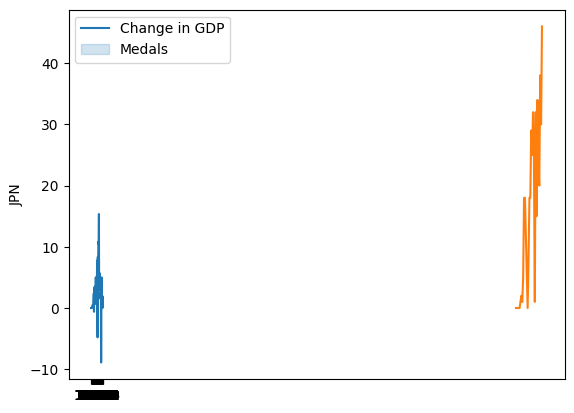

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(gdp_change.loc['GRE'], ax=ax)
sns.lineplot(totals.loc['GRE'], ax=ax)

def plot(country):
  fig, ax = plt.subplots()
  sns.lineplot(gdp_change.loc[country], ax=ax)
  sns.lineplot(totals.loc[country], ax=ax)
  ax.legend(labels=['Change in GDP', 'Medals'])

plot('USA')
plot('RUS')
plot('IND')
plot('ISV')
plot('JPN')

# Baseline
## TLDR
- predicting the gdp using the totals medals earned by a country that year: it stinks rn
- the train/test split is way too small. we will not be able to

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame
# Feature (X) and target variable (y)
X = merged_df[['GDP']]
y = merged_df['MedalsWon']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error (MSE): 368.8032745293411
R^2 Score: -0.0033635043342195026


In [ ]:
gdf = gdp_change[[1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
            1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
            1994, 1996, 1998, 2000]]
#gdf.reset_index(inplace=True)
gdf

KeyError: ignored

In [ ]:
from google.colab import files
merged_df.to_csv('FullyMelted.csv', encoding = 'utf-8-sig')
files.download('FullyMelted.csv')

# rough sort to med_sort

In [ ]:
rough_sort